# Linear Regression for Predicting Wine Quality

This notebook builds a linear model that predicts wine quality from physicochemical
properties. We use ordinary least squares with an intercept term, evaluate train/test
performance, and visualize predicted vs. true ratings.


In [1]:
# imports
import numpy as np

In [3]:
# load npz data files

data_dir = './' # change this to your data directory if needed
file_names = ['Xy.npz', 'Xy_test.npz', 'X_val.npz']


data = np.load(data_dir + 'Xy.npz')
X = data['X']
y = data['y'].squeeze()
print(f'Loaded Xy.npz: X shape = {X.shape}, y shape = {y.shape}')


data = np.load(data_dir + 'Xy_test.npz')
X_test = data['X']
y_test = data['y'].squeeze()
print(f'Loaded Xy_test.npz: X shape = {X_test.shape}, y shape = {y_test.shape}')

data = np.load(data_dir + 'X_val.npz')
X_val = data['X']
print(f'Loaded X_val.npz: X shape = {X_val.shape}')

'''
data = np.load(data_dir + 'y_val.npz')
y_val = data['y'].squeeze()
print(f'Loaded y_val.npz: y shape = {y_val.shape}')'''

Loaded Xy.npz: X shape = (5197, 11), y shape = (5197,)
Loaded Xy_test.npz: X shape = (1290, 11), y shape = (1290,)
Loaded X_val.npz: X shape = (10, 11)


"\ndata = np.load(data_dir + 'y_val.npz')\ny_val = data['y'].squeeze()\nprint(f'Loaded y_val.npz: y shape = {y_val.shape}')"

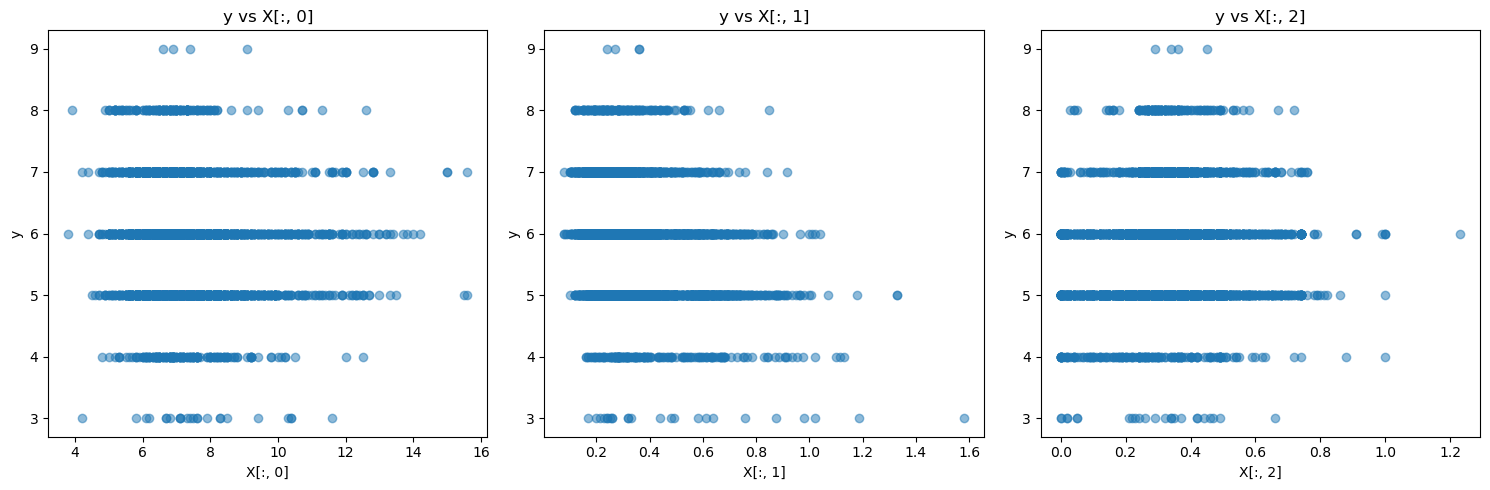

In [4]:
# plot y as a function of a few coordinates of x in a row of figures to see what the data looks like. Feel free to modify.

import matplotlib.pyplot as plt
fig, axs = plt.subplots(1, 3, figsize=(15, 5))
axs[0].scatter(X[:, 0], y, alpha=0.5)
axs[0].set_xlabel('X[:, 0]')
axs[0].set_ylabel('y')
axs[0].set_title('y vs X[:, 0]')

axs[1].scatter(X[:, 1], y, alpha=0.5)
axs[1].set_xlabel('X[:, 1]')
axs[1].set_ylabel('y')
axs[1].set_title('y vs X[:, 1]')
axs[2].scatter(X[:, 2], y, alpha=0.5)
axs[2].set_xlabel('X[:, 2]')
axs[2].set_ylabel('y')
axs[2].set_title('y vs X[:, 2]')
plt.tight_layout()
plt.show()

In [5]:
# also print some of the rows of X and y for inspection

for i in range(5):
    print(f'X[{i}, :] = {X[i, :]}')
    print(f'y[{i}] = {y[i]}')

X[0, :] = [6.600e+00 2.400e-01 3.500e-01 7.700e+00 3.100e-02 3.600e+01 1.350e+02
 9.938e-01 3.190e+00 3.700e-01 1.050e+01]
y[0] = 5
X[1, :] = [ 8.3      0.28     0.48     2.1      0.093    6.      12.       0.99408
  3.26     0.62    12.4    ]
y[1] = 7
X[2, :] = [7.7000e+00 7.1500e-01 1.0000e-02 2.1000e+00 6.4000e-02 3.1000e+01
 4.3000e+01 9.9371e-01 3.4100e+00 5.7000e-01 1.1800e+01]
y[2] = 6
X[3, :] = [5.200e+00 3.700e-01 3.300e-01 1.200e+00 2.800e-02 1.300e+01 8.100e+01
 9.902e-01 3.370e+00 3.800e-01 1.170e+01]
y[3] = 6
X[4, :] = [6.600e+00 2.600e-01 5.600e-01 1.540e+01 5.300e-02 3.200e+01 1.410e+02
 9.981e-01 3.110e+00 4.900e-01 9.300e+00]
y[4] = 5


In [6]:
import numpy as np

# build design matrix with intercept
ones = np.ones((X.shape[0], 1))
A_train = np.hstack([ones, X])   # shape (5197, 12)
b_train = y                      # shape (5197,)

# solve least squares using QR-based solver
theta_star, residuals, rank, s = np.linalg.lstsq(A_train, b_train, rcond=None)


print("theta* shape:", theta_star.shape)
print("theta* =", theta_star)


theta* shape: (12,)
theta* = [ 5.94198049e+01  7.89745021e-02 -1.35077543e+00 -1.43777787e-01
  4.59486486e-02 -3.32841878e-01  7.02505873e-03 -2.66335836e-03
 -5.89450517e+01  4.82842217e-01  8.08359808e-01  2.70669375e-01]


In [7]:
import numpy as np

ones_train = np.ones((X.shape[0], 1))
A_train = np.hstack([ones_train, X])

ones_test = np.ones((X_test.shape[0], 1))
A_test = np.hstack([ones_test, X_test])

# predictions
# Fit θ in y ≈ A_train @ θ using least squares (QR-based implementation)
y_train_pred = A_train @ theta_star
y_test_pred  = A_test  @ theta_star

# Compute relative squared-error on train and test
train_rel_err = np.sum((y - y_train_pred)**2)     / np.sum(y**2)
test_rel_err  = np.sum((y_test - y_test_pred)**2) / np.sum(y_test**2)

print("Train relative error(theta*):", train_rel_err)
print("Test  relative error(theta*):", test_rel_err)


Train relative error(theta*): 0.015571942222558392
Test  relative error(theta*): 0.015722176176381768


In [8]:
# Predictions on validation set

ones_val = np.ones((X_val.shape[0], 1))
A_val = np.hstack([ones_val, X_val])    # add intercept column

y_val_pred = A_val @ theta_star         # shape (10,)
print(y_val_pred)
print(np.round(y_val_pred, 2))


[5.55149331 6.05529338 5.51852747 5.32000053 5.66198691 4.6703953
 5.17628469 6.81595215 5.3089066  5.51282829]
[5.55 6.06 5.52 5.32 5.66 4.67 5.18 6.82 5.31 5.51]


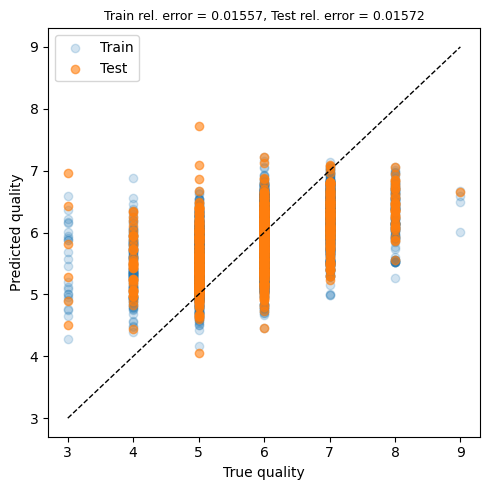

In [9]:
import matplotlib.pyplot as plt
import numpy as np

# predictions if you don't still have them in memory
ones_train = np.ones((X.shape[0], 1))
A_train = np.hstack([ones_train, X])
y_train_pred = A_train @ theta_star

ones_test = np.ones((X_test.shape[0], 1))
A_test = np.hstack([ones_test, X_test])
y_test_pred = A_test @ theta_star

plt.figure(figsize=(5, 5))

# train points
plt.scatter(y, y_train_pred, alpha=0.2, label='Train')

# test points
plt.scatter(y_test, y_test_pred, alpha=0.6, label='Test')

# y = x line
y_min = min(y.min(), y_test.min(), y_train_pred.min(), y_test_pred.min())
y_max = max(y.max(), y_test.max(), y_train_pred.max(), y_test_pred.max())
plt.plot([y_min, y_max], [y_min, y_max], 'k--', linewidth=1)

plt.xlabel('True quality')
plt.ylabel('Predicted quality')

title = (
    f'Train rel. error = {train_rel_err:.5f}, '
    f'Test rel. error = {test_rel_err:.5f}'
)
plt.title(title, fontsize=9)

plt.legend()
plt.tight_layout()
plt.show()


### Model performance summary

The train and test relative errors are both around 1.6%, indicating that a simple
linear model captures most of the variation in quality scores for this dataset.
The scatter plot of predicted vs. true quality shows points clustered near the
diagonal, with some spread mainly at higher and lower quality levels.
